
# Lab 2 Implementation of MLPs moons classification
This notebook has been prepared by Hsiu-Wen Chang from MINES ParisTech Shall you have any problem, send me [email](hsiu-wen.chang_joly@mines-paristech.fr)




## 1. Understand and experiment MLP on a VERY simple classification problem

Number of training examples =  270

  first  27 training examples
[  Input_features  ]     [Target_output]
[-0.21885611 -0.69162578] [0. 1.]
[-1.5531359   1.19785075] [1. 0.]
[ 0.4514239  -2.00916202] [0. 1.]
[ 0.72723877 -1.61687029] [0. 1.]
[ 1.14918111 -0.78203507] [0. 1.]
[0.27780984 0.82780173] [1. 0.]
[ 1.49109483 -0.32997484] [0. 1.]
[-0.23922027  1.48525044] [1. 0.]
[ 0.38701983 -1.33909324] [0. 1.]
[-0.23989042  1.23885869] [1. 0.]
[-0.20894604 -0.11402918] [0. 1.]
[-0.52678169  0.95801011] [1. 0.]
[0.42208726 0.95490042] [1. 0.]
[ 1.616884   -0.99924404] [0. 1.]
[-1.61846304 -0.62135995] [1. 0.]
[0.12044951 1.47646157] [1. 0.]
[-0.23244694 -0.76674849] [0. 1.]
[-0.95329307  1.06571308] [1. 0.]
[ 1.29453831 -0.2598868 ] [0. 1.]
[ 0.93845623 -1.3659069 ] [0. 1.]
[-1.08190528  1.04028929] [1. 0.]
[0.26147386 0.40526435] [1. 0.]
[-0.19471534  1.12166198] [1. 0.]
[-0.49510682 -0.21244696] [0. 1.]
[ 1.34677314 -0.78409988] [0. 1.]
[ 1.1074527  -0.55323668] [0. 1.]
[-0.31997339 -0.0

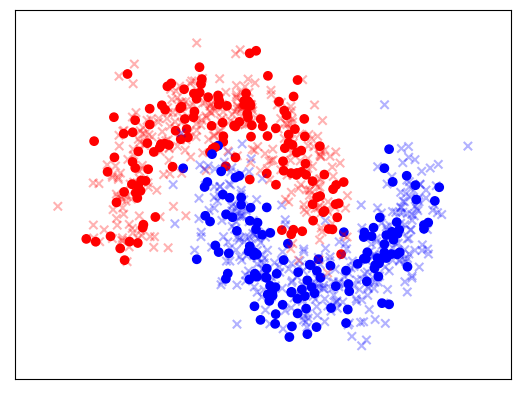

In [2]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Create artificial dataset (classification problem within 2 classes within R^2 input space)
Xmoon, y_moon = make_moons(n_samples=900, noise=0.2, random_state=0)

# Preprocess dataset, and split into training and test part
Xmoon = StandardScaler().fit_transform(Xmoon)
Xmoon_train, Xmoon_test, y_moon_train, y_moon_test = train_test_split(Xmoon, y_moon, test_size=0.7)

# Encode class labels as binary vector (with exactly ONE bit set to 1, and all others to 0)
Ymoon_train_OneHot = np.eye(2)[y_moon_train]
Ymoon_test_OneHot = np.eye(2)[y_moon_test]

# Print beginning of training dataset (for verification)
print("Number of training examples = ", y_moon_train.size)
print()
print("  first ", round(y_moon_train.size/10), "training examples" )
print("[  Input_features  ]     [Target_output]")
for i in range( int(round(y_moon_train.size/10) )):
    print( Xmoon_train[i], Ymoon_train_OneHot[i])

# Plot training+testing dataset
################################
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points...
plt.scatter(Xmoon_train[:, 0], Xmoon_train[:, 1], c=y_moon_train, cmap=cm_bright)
#   ...and testing points
plt.scatter(Xmoon_test[:, 0], Xmoon_test[:, 1], marker='x', c=y_moon_test, cmap=cm_bright, alpha=0.3)

# Define limits/scale of plot axis
x_min, x_max = Xmoon[:, 0].min() - .5, Xmoon[:, 0].max() + .5
y_min, y_max = Xmoon[:, 1].min() - .5, Xmoon[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

# Actually render the plot
print()
print("PLOT OF TRAINING EXAMPLES AND TEST DATASET")
print("Datasets: circles=training, light-crosses=test [and red=class_1, blue=class_2]")

plt.ioff()
plt.show()

**Define Model**

FIrst we try to build a very simple MLP (input, 2 hidden units with tanh activation, outputs with softmax) and define the needed functions one by one

Now we try to define these functions
1. initialization
2. forward
3. loss
4. Backward
5. optimize

Then we will combine all of them as a class for training

In [ ]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [2]:
def __init__(n_x, n_h,n_y):
    """ 
    n_x: dimension of input
    n_h: dimension of hidden 
    n_y: dimension of output
    
    return:
    w1(n_h,n_x): weight between input and hidden
    b1(n_h): bias 1
    w2(n_y,n_h): weight between hidden layer and output layer
    b2(n_y): bias 2
    """
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    return W1,b1,W2,b2

#test your function
w1, b1, w2,b2 = __init__(2,10,1)
print(f'w1:\n{w1}\nb1:\n{b1}\nw2:\n{w2}\nb2:\n{b2}')

w1:
[[-0.00206156  0.01369633]
 [-0.00184706 -0.00229427]
 [ 0.00109541  0.00805906]
 [-0.00844168  0.01248756]
 [-0.00258279 -0.02530018]
 [ 0.00190235  0.00311659]
 [ 0.0119034  -0.00500557]
 [ 0.00792686  0.00999782]
 [ 0.00393817  0.00792575]
 [-0.01201295  0.01525078]]
b1:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
w2:
[[ 0.00912771  0.00348519 -0.00650747 -0.00486104 -0.01731348 -0.01291371
  -0.0056553   0.0082466   0.01245653  0.00663434]]
b2:
[[0.]]


**Forward**

$ h = \sigma1 (xw_1 + b_1) $, where $w_1$ and $b_1$ are respectively the weight and the bias used to compute the hidden unit from the input.

$ y = \sigma2 (hw_2 + b_2) $, where $w_2$ and $b_2$ are respectively the weight and the bias used to compute the output from the hidden unit.

choose $\sigma_1$ as tanh and $\sigma_2$ as sigmoid

For the computational speed, we will output internal values for backward function. Note: we don't need to do it once we combine all the functions in to one class (they will share values)

In [ ]:
def forward(X,w1,b1,w2,b2):
    # TODO: fill in your code
    # z1: w1x+b
    # A1: tanh(z1)
    # z2: w2A1+b2
    # A2: sigmoid(z2)
    
    return 0, 0 #output A2, A1


# A little test
(output,A1) = forward(Xmoon_train[1, :],w1,b1,w2,b2)
print(output)

Here we will consider as a loss function as logistic regression:

$ L = \frac{-\sum{log(output)*Y+log(1-output)*(1-Y)}}{m} $

In [4]:
def loss(Y,y):
    #TODO
    loss = 0#revise it to the correct one
    return loss 

# A little test
print(loss(1,0.1))

0


**Backpropagation**

we can express the gradient of L with respect to the weights (or biases) as:

$ 
\begin{equation} 
    \begin{split}
        \frac{\partial L}{\partial w_2} & = \frac{\partial L}{\partial y} \frac{\partial y}{\partial w_2}\\
                                        & = \frac{\partial L}{\partial y} \frac{\partial y}{\partial z_2} \frac{\partial z_2}{\partial w_2} \\
    \end{split}
\end{equation}
$


Same goes for the weight $ w_1 $:

$ 
\begin{equation} 
    \begin{split}
        \frac{\partial L}{\partial w_1} & = \frac{\partial L}{\partial y} \frac{\partial y}{\partial w_1}\\
                                        & = \frac{\partial L}{\partial y} \frac{\partial y}{\partial z_2} \frac{\partial z_2}{\partial w_1} \\
                                        & = \frac{\partial L}{\partial y} \frac{\partial y}{\partial z_2} \frac{\partial z_2}{\partial h} \frac{\partial h}{\partial w_1} \\
                                        & = \frac{\partial L}{\partial y} \frac{\partial y}{\partial z_2} \frac{\partial z_2}{\partial h} \frac{\partial h}{\partial z_1} \frac{\partial z_1}{\partial w_1}
    \end{split}
\end{equation}
$

One very important thing to notice here is that the evaluation of the gradient $\frac{\partial L}{\partial w_1}$ can reuse some of the calculations perfomed during the evaluation of the gradient $\frac{\partial L}{\partial w_2}$. It is even clearer if we evaluate the gradient $\frac{\partial L}{\partial b_1}$:

$ 
\begin{equation} 
    \begin{split}
        \frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial y} \frac{\partial y}{\partial z_2} \frac{\partial z_2}{\partial h} \frac{\partial h}{\partial z_1} \frac{\partial z_1}{\partial b_1}
    \end{split}
\end{equation}
$

We see that the first four term on the righ hand of the equation are the same than the one from $\frac{\partial L}{\partial w_1}$.

As you can see in the equations above, we calculate the gradient starting from the end of the computational graph, and proceed backward to get the gradient of the loss with respect to the weights (or the biases). This backward evaluation gives its name to the algoritm: backpropagation

In pratice, one iteration of gradient descent would now require one forward pass, and only one pass in the reverse direction computing all the partial derivatives starting from the output node. It is therefore way more efficient than the previous approaches. In the original paper about backpropagation published in 1986 [4] , the authors (among which Geoffrey Hinton) used for the first time backpropagation to allow internal hidden units to learn features of the task domain. 

In [ ]:
# Functions you can use: np.dot, np.sum

def backward(X,Y,A1):
    """ Back-progagate gradient of the loss
    X: input
    Y: target
    A1: output of hidden neuron"""
    m = X.shape[0]
    #TODO: update these values
    dZ2 = 0
    dW2 = 0
    db2 = 0
    dZ1 = 0
    dW1 = 0
    db1 = 0
    return (dZ2, dW2,db2,dZ1,dW1,db1)

# Little test
(dZ2, dW2,db2,dZ1,dW1,db1) = backward(x_train[1, :],y_train[1],A1)

**Now we combines they into a class**

In [ ]:
class Neural_Network:
    def __init__(self, n_in, n_hidden, n_out):
        # Network dimensions
        self.n_x = n_in
        self.n_h = n_hidden
        self.n_y = n_out
        
        # Parameters initialization
        self.W1 = np.random.randn(self.n_h, self.n_x) * 0.01
        self.b1 = np.zeros((self.n_h, 1))
        self.W2 = np.random.randn(self.n_y, self.n_h) * 0.01
        self.b2 = np.zeros((self.n_y, 1))

    def forward(self, X):
        """ Forward computation """

    
    def back_prop(self,  X, Y):
        """ Back-progagate gradient of the loss """


    def train(self, X, Y, epochs, learning_rate=1.2):
        """ Complete process of learning, alternates forward pass,
            backward pass and parameters update """
        m = X.shape[0]
        for e in range(epochs):
            self.forward(X)
            loss = -np.sum(np.multiply(np.log(self.A2), Y) + np.multiply(np.log(1-self.A2),  (1 - Y))) / m
            self.back_prop(X, Y)

            self.W1 -= learning_rate * self.dW1
            self.b1 -= learning_rate * self.db1
            self.W2 -= learning_rate * self.dW2
            self.b2 -= learning_rate * self.db2

            if e % 1000 == 0:
                print("Loss ",  e, " = ", loss)

    def predict(self, X):
        """ Compute predictions with just a forward pass """
        self.forward(X)
        return np.round(self.A2).astype(np.int)

**Now we create a class of it, train and see the prediction**

In [ ]:
nn = Neural_Network(2, 10, 1)
nn.train(X, Y, 5000, 1.2)

show_predictions(nn, X, Y, "Neural Network")

nn_predictions = nn.predict(X)
print("Neural Network accuracy : ", np.sum(nn_predictions == Y) / Y.shape[0])

## Building, training and evaluating it by using Scikit-learn class

Please  read the [*MLPClassifier documentation*](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifierMLPClassifier); to understand all parameters of the constructor.
You can then begin by running the code block below, in which an initial set of hyper-parameter values has been chosen.
**YOU MAY NEED TO CHANGE AT LEAST THE NUMBER OF HIDDEN NEURONS (and probably other hyper-parameters) IN ORDER TO BE ABLE TO LEARN A CORRECT CLASSIFIER**


In [ ]:
#########################################################
# Create, fit and evaluate a MLP neural network classifier
#########################################################
from sklearn.neural_network import MLPClassifier

# Create the MLP (with specific values for hyper-parameters)
mlp = MLPClassifier(hidden_layer_sizes=(1, ), activation='tanh', solver='sgd', 
                    alpha=0.0000001, batch_size=4, learning_rate='constant', learning_rate_init=0.005, 
                    power_t=0.5, max_iter=9, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.2, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(mlp)
# NB about syntax for hidden layers: hidden_layer_sizes=(H1, ) means ONE hidden layer containing H1 neurons,
#   while hidden_layer_sizes=(H1,H2, ) would mean TWO hidden layers of respective sizes H1 and H2
# NB about iteration: max_iter specifies a number of EPOCHS (= going through all training examples)

# Train the MLP classifier on the training dataset
mlp.fit(Xmoon_train, Ymoon_train_OneHot)
print()

# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING ERROR during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING ERROR")
plt.plot(mlp.loss_curve_)
plt.show()

# Evaluate acuracy on TEST data
score = mlp.score(Xmoon_test,Ymoon_test_OneHot)
print("Acuracy (on test set) = ", score)
              

## Below, we visualize the learnt boundary between classes in (2D) input space ##

**THIS SHOULD HELP YOU UNDERSTAND WHAT HAPPENS IF THERE ARE NOT ENOUGH HIDDEN NEURONS**

Optional: add code that visualises on the same plot the straight lines corresponding to each hidden neuron (you will need to dig into MLPClassifier documentation to find the 2 input weights and the bias of each hidden neuron). YOU SHOULD NOTICE THAT THE CLASSIFICATION BOUNDARY IS SOME INTERPOLATION BETWEEN THOSE STRAIGHT LINES.

In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
#   point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Compute class probabilities for each mesh point
Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(Xmoon_train[:, 0], Xmoon_train[:, 1], c=y_moon_train, cmap=cm_bright)
# and testing points
plt.scatter(Xmoon_test[:, 0], Xmoon_test[:, 1], marker='x', c=y_moon_test, cmap=cm_bright, alpha=0.3)

# Axis ranges 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# Print acuracy on plot
plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

# Actually plot
plt.ioff()
plt.show()


Now, **check, by changing MLPClassifier parameters above and then rerunning training+eval+plots, the impact of main learning hyper-parameters:**
- **number of neurons on hidden layer**: if very small, the classification boundary shall be too simple; if too large, overfitting might occur more easily. 
    **NB: generally, only ONE hidden layer is sufficient (cf. Cybenko theorem)**; *using more than one may require using ReLU as activation function, to avoid gradient "vanishing".*
- **activation functions**
- **number of iterations**: if too small, the training does not finish to converge; if too large, overfitting may occur. 
   **NB: it is therefore usually better to use "early_stopping" with quite large max_iter, so that the actual number of iterations shall adapt by STOPPING WHEN VALIDATION ERROR STOPS DECREASING**
- **solver** (the best choice is generally 'adam'; for more details, see https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py) 
- **learning_rate and momentum: the *initial learning rate* ALWAYS impacts training outcome a lot** (too small may stuck training in bad local minimum; too large can induce strong error fluctuations and possibly no convergence)
- **impact of L2 weight regularization term (alpha)**


### **Finally, use grid-search and cross-validation to find an optimized set of learning hyper-parameters (see code below).**

**Because the values of learning hyper-parameters can DRASTICALLY change the outcome of training, it is ESSENTIAL THAT YOU ALWAYS TRY TO FIND OPTIMIZED VALUES FOR THE ALGORITHM HYPER-PARAMETERS. And this ABSOLUTELY NEEDS TO BE DONE USING "VALIDATION", either with a validation set separate from the training set, or using cross-validation. CROSS-VALIDATION is the MOST ROBUST WAY OF FINDING OPTIMIZED HYPER-PARAMETRS VALUES, and the GridSearchCV function of SciKit-Learn makes this rather straightforward.**

**WARNING:** GridSearchCV launches many successive training sessions, so **can be rather long to execute if you compare too many combinations**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

param_grid = [
  {'hidden_layer_sizes': [(5,), (10,), (20,), (40,)], 
   'learning_rate_init':[0.003, 0.01, 0.03, 0.1],
   'alpha': [0.00001, 0.0001, 0.001]}
 ]
print(param_grid)

# Cross-validation grid-search (for finding best possible accuracy)
clf = GridSearchCV( MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, beta_1=0.9,
                                  beta_2=0.999, early_stopping=True, epsilon=1e-08,
                                  hidden_layer_sizes=(10,), learning_rate='constant',
                                  learning_rate_init=0.005, max_iter=500, momentum=0.8,
                                  nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
                                  solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
                                  warm_start=False), 
                   param_grid, cv=3, scoring='accuracy') 
# NOTE THAT YOU CAN USE OTHER VALUE FOR cv (# of folds) and OTHER SCORING CRITERIA OTHER THAN 'accuracy'
    
clf.fit(Xmoon_train, Ymoon_train_OneHot)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = Ymoon_test_OneHot, clf.predict(Xmoon_test)
print(classification_report(y_true, y_pred))
print()

Part of the code is revised from Prof. Fabien Moutarde
